In [12]:
words = open('names.txt', 'r').read().splitlines() # reading the document and by splitlines we convert result to python list

In [13]:
words[:10] #looking at first 10 names of the words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [14]:
min([len(word) for word in words]) #shortest word length inn the data

2

In [15]:
max([len(word) for word in words])

15

In [16]:
#creating biagram language model which is simpleset language character predicting model
#where you predict characters of the words in accordance to the previous character that comes
#ex: olivia will be predicted by: char 'l' will be predicted by char 'o', char 'i' predicted by 'l', char 'v' by 'i' until the end
#important note is that char of 'whitespace' that indicates finish of word will be predicted by 'a' char
#we are only handling 2 chars at a time during algorithm
#simple and weak language model but great place to start

b = {} #creating dictionary to keep up the count with all of the pair char occurences 
for word in words: 
    chs = ['<S>'] + list(word) + ['<E>'] #word is string so we need to convert to list
    #reason we do above thing is we also want to know the info about how start and finish occur in the word so we can also evaluate those situations char by char
    for chr1, chr2 in zip(chs, chs[1:]): #great trick: zip only cares about smallest length list (word[1:]) so there is no index out of error
        #zip returns tuple list so we can call chr1 and chr2 like this
        biagram = (chr1, chr2) 
        b[biagram] = b.get(biagram, 0) + 1 #if there is no biagram found return 0, btw this call also creates new biagram with gives values, great sytnax


In [17]:
sorted(b.items(), key = lambda ky: -ky[1]) #by default key is ky[0] but we want list to be sorted based on number of occurence
#sort sorts the list for the smallest value 1.2.3 so by making key -, we make 60000 value the smallest value by converting it to -6000-

# chrs = []
# for x in b.items():
#     chrs.append(x[0])
# chrss = []
# for x in chrs:
#     chrss.append(x[0])
#     chrss.append(x[1])

# len(set(chrss))
#my first try to find unique characters within key of b
#improved answer
chrs = set()
for bgrm in b.keys():
    chrs.update(bgrm)
len(chrs)

28

In [18]:
import torch

In [19]:
N = torch.zeros(27, 27, dtype=torch.int32)
chars = sorted(list(set(''.join(words))))
stoi = {n: i + 1 for i, n in enumerate(chars)}
stoi['.'] = 0
itos = {i: n for n, i in stoi.items()}


In [20]:
for word in words: 
    chs = ['.'] + list(word) + ['.'] #word is string so we need to convert to list
    #reason we do above thing is we also want to know the info about how start and finish occur in the word so we can also evaluate those situations char by char
    for chr1, chr2 in zip(chs, chs[1:]): #great trick: zip only cares about smallest length list (word[1:]) so there is no index out of error
        #zip returns tuple list so we can call chr1 and chr2 like this
        xi1 = stoi[chr1]
        xi2 = stoi[chr2]
        N[xi1, xi2] += 1
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

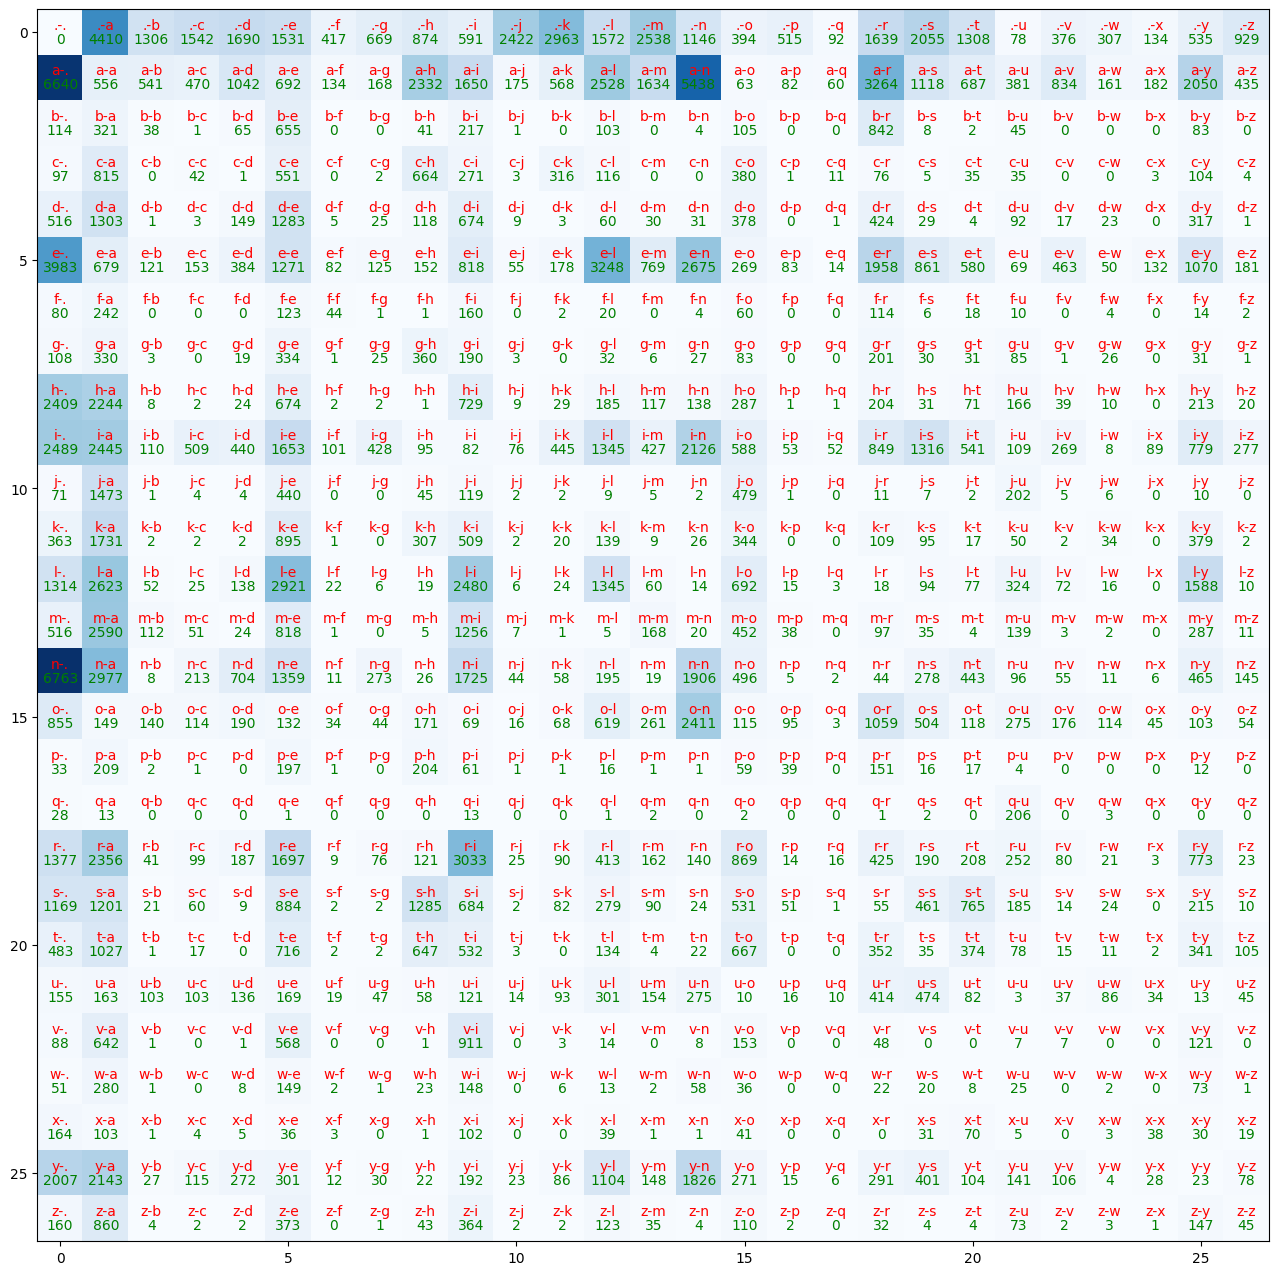

In [21]:
#to make the output much more nicer27
#at first we initiliezed special characteres as <e> and <s> but this implementation caused 1 col and row of complete 0 and 2 by 2 matrix of 0 values
#so we instead put them char of '.' and made it 0 index and increased every other char index by 1
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
for i in range(len(itos)):
    for j in range(len(itos)):
        chstr = f'{itos[i]}-{itos[j]}' 
        plt.text(j, i, chstr, ha='center', va='bottom', color='red')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='green')

plt.imshow(N, cmap='Blues')


In [22]:
#gettings samples from frequent occurence of pairs and predicting next one

g = torch.Generator().manual_seed(2147483647) #for random generator to get exact same results from video
p = N[0].float()
p = p / p.sum() #creates a probability distribution over all of the occurence of the char
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # from given prob distribution, multinomial outputs index of the given array based on the probabilitions given
itos[ix]

'j'

In [23]:
# P = N.float()
# for i in range(len(itos)):
#    p = P[i].float()
#    p = p / p.sum()
#this is one way to create probabilty distribution but using torchs default ways are always much better
P = (N + 1).float() #this plus 1 is important because we get rid of the 0 values for not getting -inf in log calc and we dont change overall probabilty distribution
#this is called 'graph smoothing'
print(P[:, 0])

# P = P / P.sum(1, keepdim=True)
#this implementation is efficient becuase we dont create new variable in the memory
P /= P.sum(1, keepdim=True)


for _ in range(20):
    out = []
    ix = 0
    while True:
        g = torch.Generator().manual_seed(2147483647) #for random generator to get exact same results from video
        #   p = N[ix].float()
        #   p = p / p.sum() #creates a probability distribution over all of the occurence of the char
        #above logic works fine but not that efficient because we create probabity distribution for every iteration
        #what can we do instead is just creating whole P tensor that will already include probability distribution of every row
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True).item() #from given prob distribution, multinomial outputs index of the given array based on the probabilitions given
        out.append(itos[ix])
        if(ix == 0):
            break

    print(''.join(out))

tensor([1.0000e+00, 6.6410e+03, 1.1500e+02, 9.8000e+01, 5.1700e+02, 3.9840e+03,
        8.1000e+01, 1.0900e+02, 2.4100e+03, 2.4900e+03, 7.2000e+01, 3.6400e+02,
        1.3150e+03, 5.1700e+02, 6.7640e+03, 8.5600e+02, 3.4000e+01, 2.9000e+01,
        1.3780e+03, 1.1700e+03, 4.8400e+02, 1.5600e+02, 8.9000e+01, 5.2000e+01,
        1.6500e+02, 2.0080e+03, 1.6100e+02])
y.
fe.
ciahanhame.
misie.
bteti.
jabiedrraasei.
ker.
a.
e.
aletelannda.
rth.
ja.
ayrrelyama.
he.
setabe.
zanndot.
salan.
i.
ddinniquzerareyartoriulelin.
dagon.


In [24]:
#previosly we normalized 2d array into probabilty distribution, now we need to be able to show all of the parameters' (probability distributin element) performance with a single value
#there is method of negative likelyhood, when output of probabilty distribition is way to small and you need a way to show all of the probabilities
#as a number that goes to 0 when it predicts the given training data successfully

'''
GOAL: maximize overall likelyhood value for all of the parameters which are probabiliry values of biagrams
equivilent to maximize log likelyhood to give us a value approaching to 0 and easy to play with (because log is monotomic, great conversion for values between 0-1 that goes to negative infinite, check desmos for visualizing)
equivilent to decreasing negative log likelyhood because we want a descent from positive value to 0 not negative to 0
equivilent to decreasing overall average of negative log for all of the parameters in the model.
'''


log_likelyhood = 0
n= 0
for word in ["andrejq"]: 
    chs = ['.'] + list(word) + ['.']
    for chr1, chr2 in zip(chs, chs[1:]): 
        xi1 = stoi[chr1]
        xi2 = stoi[chr2]
        prb = P[xi1, xi2]
        logprob = torch.log(prb)
        log_likelyhood += logprob
        n += 1
        print(f'{prb=} {logprob=} {log_likelyhood}')

print(f'{log_likelyhood=}')
nll = -log_likelyhood
print(f'{nll}')
print(f'{nll/n}') # we are trying to decrease this overall minus log likelyhood


prb=tensor(0.1376) logprob=tensor(-1.9835) -1.983507752418518
prb=tensor(0.1604) logprob=tensor(-1.8302) -3.8136816024780273
prb=tensor(0.0384) logprob=tensor(-3.2594) -7.073086738586426
prb=tensor(0.0770) logprob=tensor(-2.5646) -9.637674331665039
prb=tensor(0.1334) logprob=tensor(-2.0143) -11.651948928833008
prb=tensor(0.0027) logprob=tensor(-5.9004) -17.552335739135742
prb=tensor(0.0003) logprob=tensor(-7.9817) -25.534069061279297
prb=tensor(0.0970) logprob=tensor(-2.3331) -27.867216110229492
log_likelyhood=tensor(-27.8672)
27.867216110229492
3.4834020137786865


In [25]:
#creating training dataset for all of biagrams in format of two different lists
xs, ys = [], []
for word in words[:1]: 
    chs = ['.'] + list(word) + ['.']
    for chr1, chr2 in zip(chs, chs[1:]): 
        xi1 = stoi[chr1]
        xi2 = stoi[chr2]
        xs.append(xi1)
        ys.append(xi2)
xs = torch.tensor(xs) # torch.Tensor also does exact same thing, converting list to tensor, but this method also infers data types from given input but Tensor makes float32 automaticlly.
#so stick with torch.tensor while creating tensors
ys = torch.tensor(ys)

In [26]:
xs

tensor([ 0,  5, 13, 13,  1])

In [27]:
ys

tensor([ 5, 13, 13,  1,  0])

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])


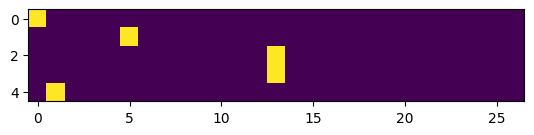

In [28]:
#to feed the integer values to NN, we need some way to represent given inputs as a vector, ONE HOT
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float() #convert integer value to binary vector where the index corresponding in the vector turns 1 every other is 0
#we need to always consider types of the returned functions
yenc = F.one_hot(ys, num_classes=27).float()
print(xenc)
plt.imshow(xenc)


In [29]:
W = torch.randn((27,27)) #randomly generated numbers distributed by normal distribution
#first and only layer of NN, has 27 neurons and connected to 27 neurons as output
xenc @ W #dot product symbol


tensor([[ 0.0315, -2.6017,  0.0821,  1.2475, -0.5560, -0.0532, -1.3188,  1.1064,
          1.0623,  0.6410,  0.0084,  0.5358, -0.0721,  1.7208,  1.1562,  0.5795,
         -0.4858,  0.3133,  0.6651,  0.6721, -0.0793,  0.3348,  0.1811, -1.7886,
         -0.3662, -0.8359, -1.6226],
        [ 0.0441,  0.3035,  0.4761,  0.5568,  0.3784, -0.6980,  0.7590,  1.1365,
          0.3880, -1.6434, -0.3033,  1.5297, -1.0193, -2.0366,  0.5301, -1.5930,
         -1.1331, -0.5334, -1.6473, -0.3250,  0.2656,  0.5590,  0.7584, -0.2290,
          1.4159,  0.3976,  0.0927],
        [-1.0301,  1.0294, -0.0576, -1.5478,  0.1906, -1.2654,  1.2228, -0.3027,
          1.1680,  2.3904, -1.8360, -1.9516,  1.0292,  1.8036, -0.2177, -0.4907,
          0.5896, -0.5664,  0.1804, -0.0362,  0.7666,  1.1042, -0.0438, -0.6199,
          1.8575, -1.1676,  0.5575],
        [-1.0301,  1.0294, -0.0576, -1.5478,  0.1906, -1.2654,  1.2228, -0.3027,
          1.1680,  2.3904, -1.8360, -1.9516,  1.0292,  1.8036, -0.2177, -0.4907

In [30]:
(xenc @ W).exp() #turning negative numebers to positive and postive numbers more positive --> will be used for softmax

tensor([[ 1.0320,  0.0742,  1.0856,  3.4818,  0.5735,  0.9482,  0.2675,  3.0236,
          2.8931,  1.8984,  1.0085,  1.7088,  0.9304,  5.5890,  3.1779,  1.7851,
          0.6152,  1.3680,  1.9447,  1.9583,  0.9237,  1.3976,  1.1986,  0.1672,
          0.6933,  0.4335,  0.1974],
        [ 1.0451,  1.3547,  1.6098,  1.7450,  1.4599,  0.4976,  2.1362,  3.1159,
          1.4741,  0.1933,  0.7384,  4.6169,  0.3608,  0.1305,  1.6991,  0.2033,
          0.3220,  0.5866,  0.1926,  0.7225,  1.3042,  1.7489,  2.1348,  0.7953,
          4.1202,  1.4883,  1.0971],
        [ 0.3570,  2.7994,  0.9441,  0.2127,  1.2100,  0.2821,  3.3967,  0.7388,
          3.2156, 10.9181,  0.1594,  0.1420,  2.7989,  6.0713,  0.8043,  0.6122,
          1.8033,  0.5676,  1.1977,  0.9644,  2.1524,  3.0169,  0.9571,  0.5380,
          6.4079,  0.3111,  1.7463],
        [ 0.3570,  2.7994,  0.9441,  0.2127,  1.2100,  0.2821,  3.3967,  0.7388,
          3.2156, 10.9181,  0.1594,  0.1420,  2.7989,  6.0713,  0.8043,  0.6122

In [31]:
logits = xenc @ W #also called log-counts 
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True) #summing rows and dividing column by column
#above 2 lines are basically softmax

In [65]:
nlls = torch.zeros(5)
for i in range(5):
    xi = xs[i].item()
    yi = ys[i].item()
    print('------')
    print(f'biagram example {i=} examples {itos[xi]}{itos[yi]} are index of {xi}-{yi}')
    print(f'input to the neural net {xi}')
    print(f'output vector that neural network produced {prob[i]}')
    print(f'actual output that we want (label) {yi}')
    print(f"probability that is assigned by network to actual character {prob[i, yi].item()}")
    logp = torch.log(prob[i,yi])
    print(f'log likelyhood {logp.item()}')
    nll = -logp
    print(f'inverse log likelyhood {nll.item()}')
    nlls = nll
print('================')
print('average total inverse log likelyhood, total loss=', nlls.mean().item())

------
biagram example i=0 examples .e are index of 0-5
input to the neural net 0
output vector that neural network produced tensor([0.0197, 0.0038, 0.0511, 0.0085, 0.0567, 0.0439, 0.0182, 0.0016, 0.0109,
        0.0573, 0.0370, 0.0249, 0.1073, 0.0582, 0.0314, 0.0184, 0.0248, 0.0033,
        0.1089, 0.0388, 0.0807, 0.0115, 0.0235, 0.0388, 0.0048, 0.0413, 0.0747])
actual output that we want (label) 5
probability that is assigned by network to actual character 0.0439465157687664
log likelyhood -3.124781847000122
inverse log likelyhood 3.124781847000122
------
biagram example i=1 examples em are index of 5-13
input to the neural net 5
output vector that neural network produced tensor([0.0300, 0.0208, 0.0178, 0.0106, 0.0024, 0.0089, 0.0092, 0.0306, 0.0220,
        0.0167, 0.0109, 0.0243, 0.0695, 0.0137, 0.0069, 0.0066, 0.0134, 0.0362,
        0.3251, 0.0156, 0.0151, 0.0262, 0.0165, 0.0199, 0.1712, 0.0440, 0.0158])
actual output that we want (label) 13
probability that is assigned by networ

In [66]:
#===================Optimized yay===================#

In [75]:
xs

tensor([ 0,  5, 13, 13,  1])

In [76]:
ys

tensor([ 5, 13, 13,  1,  0])

In [77]:
g = torch.Generator()
W = torch.randn(27, 27, generator=g, requires_grad=True) #our first layer for NN

In [117]:
#forward pass
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float() #converting into binary vector and it returns int64 so convert to float
res = xenc @ W #dot product
probs = res.exp() 
probs = probs / probs.sum(1, keepdim=True)
#applying softmax

#we are interested in probabilites at indexes of ys like:
#probs[0, 5] probs[1, 13] probs[2, 13] probs[3, 1] probs[4, 0]
#shortcut to do this in pytorch is use torch.arrange(5) = [0,1,2,3,4]
loss = -probs[torch.arange(5), ys].log().mean()
loss


tensor(4.3053, grad_fn=<NegBackward0>)

In [118]:
#backward pass
W.grad = None #this is a bit efficient way to make grad 0
loss.backward() #computing gradients for every parameter for loss value

In [119]:
W.data += -0.1 * W.grad #changing data value it worksssssss

In [120]:
#####======================= real stuff ==========================####

In [7]:
import torch
words = open('names.txt', 'r').read().splitlines() # reading the document and by splitlines we convert result to python list
xi, yi = [], []
chars = sorted(list(set(''.join(words))))
stoi = {n: i + 1 for i, n in enumerate(chars)}
stoi['.'] = 0
itos = {i: n for n, i in stoi.items()}

for w in words:
    chs = '.' + w + '.'
    for ch1, ch2 in zip(chs, chs[1:]):
        xi.append(stoi[ch1])
        yi.append(stoi[ch2])
xt = torch.tensor(xi)
yt = torch.tensor(yi)
print(xt)
print(yt)
num = xt.nelement()
g = torch.Generator()
W = torch.randn((27,27), generator=g, requires_grad=True)

tensor([ 0,  5, 13,  ..., 25, 26, 24])
tensor([ 5, 13, 13,  ..., 26, 24,  0])


In [10]:
import torch.nn.functional as F

for _ in range(100):
    xenc = F.one_hot(xt, num_classes=len(stoi)).float()
    print(xenc.shape)
    #forward passtorch.nn.utils.clip_grad_norm_(W, max_norm=1.0)  # Cap gradients to a maximum norm of 1

    logits = xenc @ W
    prob = logits.exp()
    prob = prob / prob.sum(1, keepdim=True)
    print(prob.shape)
    loss = -prob[torch.arange(num), yt].log().mean()
    print(f'{loss.item() = }')
    #backward pass
    W.grad = None
    loss.backward()
    #descent
    W.data += -50 * W.grad
    #the result we expect in this case is 2.4 and it is same as calculating frequencies of pairs
    break;





torch.Size([228146, 27])
torch.Size([228146, 27])
loss.item() = 3.2245426177978516
